In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
iris = datasets.load_iris()
feature_idx = [0, 1]  # sepal length, sepal width
X = iris.data[:, feature_idx]
y = iris.target
f0, f1 = [iris.feature_names[i] for i in feature_idx]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

In [ ]:
k = 9
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn.predict(X_test_s)
print(f"KNN (k={k}) using features: {f0}, {f1}")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

KNN (k=10) using features: sepal length (cm), sepal width (cm)
Accuracy: 0.756

Confusion Matrix:
 [[15  0  0]
 [ 0 12  3]
 [ 0  8  7]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.60      0.80      0.69        15
   virginica       0.70      0.47      0.56        15

    accuracy                           0.76        45
   macro avg       0.77      0.76      0.75        45
weighted avg       0.77      0.76      0.75        45



In [ ]:
x_min, x_max = X_train_s[:, 0].min() - 1, X_train_s[:, 0].max() + 1
y_min, y_max = X_train_s[:, 1].min() - 1, X_train_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

In [ ]:

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

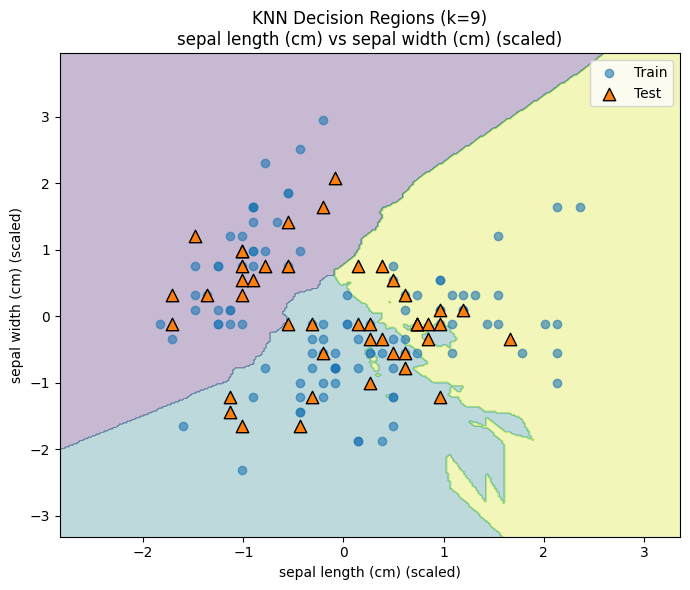

In [ ]:
plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, alpha=0.3)  # decision regions (colors auto)
plt.scatter(X_train_s[:, 0], X_train_s[:, 1], marker='o', alpha=0.6, label="Train")
plt.scatter(X_test_s[:, 0],  X_test_s[:, 1],  marker='^', s=80, edgecolor='k', label="Test")
plt.title(f"KNN Decision Regions (k={k})\n{f0} vs {f1} (scaled)")
plt.xlabel(f"{f0} (scaled)")
plt.ylabel(f"{f1} (scaled)")
plt.legend()
plt.tight_layout()
plt.show()

Best k on this split: 9 with accuracy: 0.756


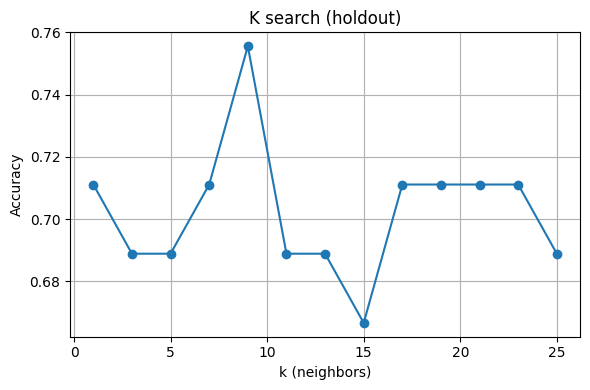

In [ ]:
ks = range(1, 26, 2)
scores = []
for kk in ks:
    m = KNeighborsClassifier(n_neighbors=kk).fit(X_train_s, y_train)
    scores.append(m.score(X_test_s, y_test))

best_k = ks[int(np.argmax(scores))]
print("Best k on this split:", best_k, "with accuracy:", round(max(scores), 3))

plt.figure(figsize=(6, 4))
plt.plot(list(ks), scores, marker='o')
plt.xlabel("k (neighbors)")
plt.ylabel("Accuracy")
plt.title("K search (holdout)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # two features for easy understanding
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

In [ ]:
error_rates = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_s, y_train)
    y_pred = knn.predict(X_test_s)
    error_rates.append(np.mean(y_pred != y_test))

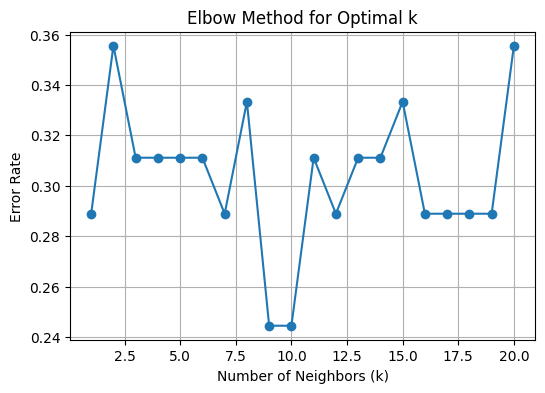

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()